In [56]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Cleveland dot plot

In [57]:
symbols = pd.read_csv('/content/drive/My Drive/edav/SP500 Components.csv', index_col=False)


In [58]:
cleveland = pd.read_csv('/content/drive/My Drive/edav/final_df.csv')

In [59]:
cleveland[["Date"]]=pd.to_datetime(cleveland['Date']).dt.year

In [60]:
dik = dict(zip(list(symbols['Symbol'].values),list(symbols['Industry'].values)))

In [61]:
cleveland['Symbol'] = cleveland['Symbol'].map(dik)

In [62]:
cleveland = cleveland[['Date','Symbol','users_holding']].groupby(["Date",'Symbol']).mean()
cleveland.reset_index(inplace=True)

In [63]:
cleveland.rename(columns={'Date':'Year','users_holding':'avg_users_holding'},inplace=True)

In [64]:
cleveland

,Year,Symbol,avg_users_holding
0,2018,Communication Services,30378.013619
1,2018,Consumer Discretionary,9154.707010
2,2018,Consumer Staples,4691.787314
3,2018,Energy,2028.257554
4,2018,Financials,2737.785070
5,2018,Health Care,2142.391454
6,2018,Industrials,4610.872628
7,2018,Information Technology,14288.381103
8,2018,Materials,842.989829
9,2018,Real Estate,1094.739498


In [102]:
#cleveland.to_csv("/content/drive/MyDrive/edav/results_data/cleveland.csv")

# General dataframe

This dataframe is a general use dataframe( we use it for multiple plots). It contains daily data on each ticker 

In [66]:
data = pd.read_csv('/content/drive/My Drive/edav/final_df.csv').dropna()

In [67]:
dik = dict(zip(list(symbols['Symbol'].values),list(symbols['Industry'].values)))
data['Symbol_industry'] = data['Symbol'].map(dik)

## Clustering on stock popylarity
We need to find away to define popular stocks. 
Here we have averaged the usersholding for each company over all dates (August 18 -August 20). We then apply a simple clustering method with 3 clusters on the average 3-year users_holding of each company.

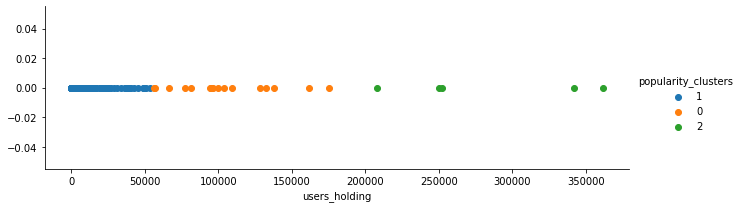

In [68]:
from sklearn.cluster import KMeans
import seaborn
import matplotlib.pyplot as plt
from  matplotlib import pyplot

popular = data.groupby(['Symbol']).mean().reset_index()
kmeans_ridge = KMeans(n_clusters=3, random_state=0).fit_predict(popular[['users_holding']])
popular['popularity_clusters'] = list(kmeans_ridge)
popular[''] = 0

fg = seaborn.FacetGrid(data=popular, hue='popularity_clusters', hue_order=[1,0,2], aspect=3)
fg.map(pyplot.scatter, 'users_holding', '').add_legend()

In [69]:
dicto = {2:'very_popular',1:'not_popular', 0:'normal'}

popular['popularity'] = popular['popularity_clusters'].map(dicto)

In [70]:
popular.groupby('popularity').count()

,Symbol,Adj Close,Volume,users_holding,vix_Adj_close,Mcap,popularity_clusters,
popularity,,,,,,,,
normal,16,16,16,16,16,16,16,16
not_popular,473,473,473,473,473,473,473,473
very_popular,5,5,5,5,5,5,5,5


In [71]:
dik_popularity = dict(zip(list(popular['Symbol'].values),list(popular['popularity'].values)))

### Next we assign to each stock its popularity level.

In [72]:
data['popularity'] = data['Symbol'].map(dik_popularity)

In [73]:
data.head(2)

,Date,Symbol,Adj Close,Volume,users_holding,vix_Adj_close,Mcap,Symbol_industry,popularity
0,2018-08-01,A,63.723564,2679200.0,712.208333,13.15,20790.4891,Health Care,not_popular
1,2018-08-01,AAL,37.332352,7080700.0,4937.916667,13.15,17563.8215,Industrials,normal


In [74]:
#data.to_csv("/content/drive/MyDrive/edav/results_data/data.csv",index=False)

# Mosaic

In [75]:
mosaic = pd.read_csv('/content/drive/My Drive/edav/final_df.csv')


In [76]:
# clean up
mosaic[["Date"]]=pd.to_datetime(mosaic['Date']).dt.year
dik = dict(zip(list(symbols['Symbol'].values),list(symbols['Industry'].values)))

In [77]:
# avergage over the Symbol and the year
mosaic = mosaic.groupby(["Symbol",'Date']).mean().reset_index()

In [78]:
# add in the industry and popularity levels
mosaic['popularity'] = mosaic['Symbol'].map(dik_popularity)
mosaic['Symbol_industry'] = mosaic['Symbol'].map(dik)

In [79]:
mosaic

,Symbol,Date,Adj Close,Volume,users_holding,vix_Adj_close,Mcap,popularity,Symbol_industry
0,A,2018,66.118280,2.573137e+06,698.947447,17.716762,21468.093648,not_popular,Health Care
1,A,2019,74.338824,2.157036e+06,1084.103682,15.387857,23629.122120,not_popular,Health Care
2,A,2020,82.527103,2.143667e+06,1354.405331,31.969456,25655.425571,not_popular,Health Care
3,AAL,2018,36.048765,8.253767e+06,6108.612375,17.716762,16901.940279,normal,Industrials
4,AAL,2019,30.571997,6.993250e+06,9504.058975,15.387857,13803.752485,normal,Industrials
...,...,...,...,...,...,...,...,...,...
1526,ZION,2019,44.107602,2.238429e+06,268.641122,15.387857,8365.479997,not_popular,Financials
1527,ZION,2020,34.860722,3.076903e+06,502.915137,31.969456,5914.069654,not_popular,Financials
1528,ZTS,2018,88.985529,2.284765e+06,842.200433,17.716762,43394.485023,not_popular,Health Care
1529,ZTS,2019,109.507183,2.110229e+06,1248.292491,15.387857,52777.773976,not_popular,Health Care


Clustering in years founded

In [80]:
years = symbols[['Year_Founded']].dropna().astype(int).sort_values(by='Year_Founded')
years.dropna(inplace=True)
dik_mosaic = dict(zip(list(symbols['Symbol'].values),list(symbols['Year_Founded'].dropna().astype(int).values)))


In [81]:
mosaic['Year_Founded'] = mosaic['Symbol'].map(dik_mosaic)
mosaic.dropna(inplace=True)

In [82]:
kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(mosaic[['Year_Founded']])
mosaic['ages'] = list(kmeans)

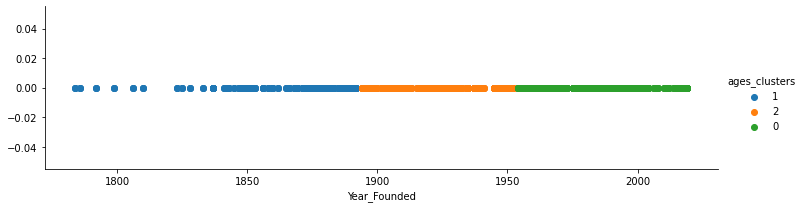

In [83]:
# this block is just for plotting the clusters
ages = mosaic.copy()
ages['ages_clusters']=ages['ages']
ages[''] = 0
fg = seaborn.FacetGrid(data=ages, hue='ages_clusters', hue_order=[1,2,0], aspect=3.4)
fg.map(pyplot.scatter, 'Year_Founded','').add_legend()

In [84]:
mosaic.loc[mosaic['ages'] == 2][['Year_Founded']].describe()


,Year_Founded
count,400.000000
mean,1921.657500
std,16.166434
min,1894.000000
25%,1906.000000
50%,1920.000000
75%,1935.000000
max,1952.000000


give the clusters more meaningful names by looking at the founded date range for each cluster

In [85]:
dicto3 = {1:'1784-1892', 2:'1894-1952', 0:'1954-2019'}

mosaic['ages'] = mosaic['ages'].map(dicto3)
mosaic['Founded_range'] = mosaic['ages'].rename({'ages':'Founded_range'})

In [86]:
mosaic.drop(columns=["ages"])

,Symbol,Date,Adj Close,Volume,users_holding,vix_Adj_close,Mcap,popularity,Symbol_industry,Year_Founded,Founded_range
0,A,2018,66.118280,2.573137e+06,698.947447,17.716762,21468.093648,not_popular,Health Care,1999.0,1954-2019
1,A,2019,74.338824,2.157036e+06,1084.103682,15.387857,23629.122120,not_popular,Health Care,1999.0,1954-2019
2,A,2020,82.527103,2.143667e+06,1354.405331,31.969456,25655.425571,not_popular,Health Care,1999.0,1954-2019
3,AAL,2018,36.048765,8.253767e+06,6108.612375,17.716762,16901.940279,normal,Industrials,1934.0,1894-1952
4,AAL,2019,30.571997,6.993250e+06,9504.058975,15.387857,13803.752485,normal,Industrials,1934.0,1894-1952
...,...,...,...,...,...,...,...,...,...,...,...
1520,ZBH,2019,127.053566,1.130505e+06,186.605161,15.387857,26312.019774,not_popular,Health Care,1873.0,1784-1892
1521,ZBH,2020,126.404630,1.628950e+06,680.685216,31.969456,26209.758586,not_popular,Health Care,1873.0,1784-1892
1522,ZBRA,2018,166.740952,4.460657e+05,321.882860,17.716762,8957.792389,not_popular,Information Technology,1952.0,1894-1952
1523,ZBRA,2019,206.708492,5.633972e+05,711.230348,15.387857,11155.455227,not_popular,Information Technology,1952.0,1894-1952


In [87]:
mosaic = pd.DataFrame(mosaic.groupby(['Symbol_industry',"Founded_range",'popularity']).size()).reset_index()

In [88]:
mosaic = mosaic.rename({0:'freq'},axis=1)

In [89]:
#mosaic.to_csv("/content/drive/MyDrive/edav/results_data/mosaic.csv",index=False)

# Experiments

In [90]:
df = pd.read_csv('/content/drive/My Drive/edav/final_df.csv')
df

,Date,Symbol,Adj Close,Volume,users_holding,vix_Adj_close,Mcap
0,2018-08-01,A,63.723564,2679200.0,712.208333,13.150000,20790.4891
1,2018-08-01,AAL,37.332352,7080700.0,4937.916667,13.150000,17563.8215
2,2018-08-01,AAP,138.336090,540200.0,283.958333,13.150000,10345.8757
3,2018-08-01,AAPL,48.465130,271742800.0,154792.750000,13.150000,973230.0890
4,2018-08-01,ABBV,82.121834,5330400.0,14192.750000,13.150000,142185.7424
...,...,...,...,...,...,...,...
257060,2020-07-31,YUM,90.606827,1914900.0,6601.333333,24.459999,27406.0500
257061,2020-07-31,ZBH,134.622543,1309300.0,1023.750000,24.459999,27889.3330
257062,2020-07-31,ZBRA,280.750000,472800.0,1076.333333,24.459999,14975.1612
257063,2020-07-31,ZION,31.881811,1442500.0,717.916667,24.459999,5324.3657


In [91]:
apple = df.loc[df['Symbol'] == "AAPL"]

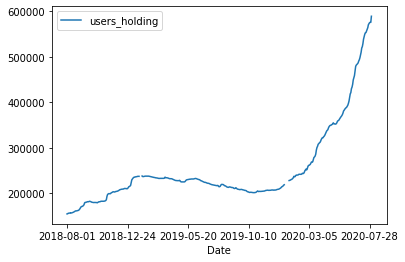

In [92]:
apple[['Date','users_holding']].set_index('Date').plot()

In [93]:
apple[['Date','users_holding']].set_index('Date')

,users_holding
Date,
2018-08-01,154792.750000
2018-08-02,155067.041667
2018-08-03,156316.666667
2018-08-06,156329.500000
2018-08-07,156652.791667
...,...
2020-07-27,572684.708333
2020-07-28,575189.166667
2020-07-29,575854.791667


## Moer

In [94]:
df2 = pd.read_csv('/content/drive/My Drive/edav/final_df.csv')

In [95]:
df2[["Date"]]=pd.to_datetime(df2['Date']).dt.year

In [96]:
dik = dict(zip(list(symbols['Symbol'].values),list(symbols['Industry'].values)))

In [97]:
df2 = df2.groupby(["Symbol",'Date']).mean().reset_index()

In [98]:
df2['Symbol_industry'] = df2['Symbol'].map(dik)
df2.dropna(inplace=True)

In [99]:
df2['popularity'] = df2['Symbol'].map(dik_popularity)

In [100]:
#df2.to_csv("/content/drive/MyDrive/edav/results_data/parallel.csv",index=False)